<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Python for Finance (2nd ed.)

**Mastering Data-Driven Finance**

&copy; Dr. Yves J. Hilpisch | The Python Quants GmbH

<img src="http://hilpisch.com/images/py4fi_2nd_shadow.png" width="300px" align="left">

# Mathematical Tools

## Approximation近似

In [1]:
import numpy as np
from pylab import plt, mpl

In [2]:
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [3]:
def f(x):
    return np.sin(x) + 0.5 * x

In [4]:
def create_plot(x, y, styles, labels, axlabels):
    plt.figure(figsize=(10, 6))
    for i in range(len(x)):
        plt.plot(x[i], y[i], styles[i], label=labels[i])
        plt.xlabel(axlabels[0])
        plt.ylabel(axlabels[1])
    plt.legend(loc=0)

axlabel是设置轴的标签，通过x/ylabel这个函数表示出来。

In [5]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 50)  

从-2π到2π中间取出50个数

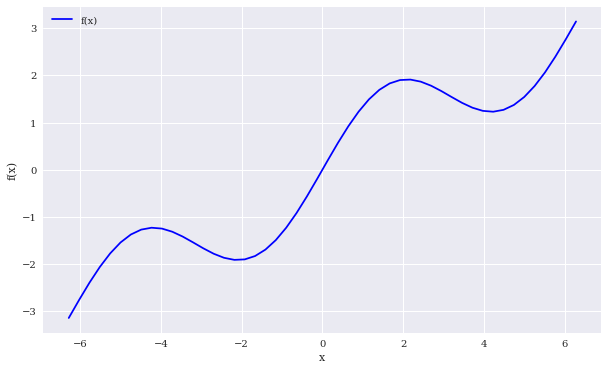

In [6]:
create_plot([x], [f(x)], ['b'], ['f(x)'], ['x', 'f(x)'])
# plt.savefig('../../images/ch11/math_01.png');

图像是奇函数，对原点做对称。

因为是使用切片的方式，所以输入的参数不管是一个还是多个，都需要用list的方式表示。

### Regression

#### Monomials as Basis Functions

In [7]:
res = np.polyfit(x, f(x), deg=1, full = True)  

In [8]:
res  

(array([ 4.28841952e-01, -1.33457859e-16]),
 array([21.03238686]),
 2,
 array([1., 1.]),
 1.1102230246251565e-14)

full = True是说返回出来参数，默认为False。

#### 第一行(array([ 4.28841952e-01, -1.33457859e-16])是估计出来的参数P，前面的是degree一次项上的参数，后面的-1.33457859e-16是0次项(degree为0/截距)，排列是按degree几次由高到低。

#### 第二行21.03238686是R^2，残差的平方和，可以看出拟合程度的好坏。

#### 第三行2代表x对应的秩是2，是full_ranked，可以使用这个方法拟合函数。

#### singular values 奇异值，就是相当于从矩阵里面分离出来的，奇異值決定了形變，大小決定在形變中的重要性。

In [9]:
ry = np.polyval(res[0], x)  

In [10]:
np.sum((f(x) - ry)**2)

21.032386859343315

#### 和第二行的值一致，是拟合出的函数和真实Y值之间的差值的平方和。ry = np.polyval(res[0], x) ；polyfit通过多项式的拟合获得了拟合后的各个degree上面的参数，res[0]：res的第0行是[ 4.28841952e-01, -1.33457859e-16]是多项式的参数。先Fit再用计算多项式的函数polyval算出具体的x对应的Y值。f(x)是函数本身对应的Y值，ry是拟合后得出的Y值。

In [11]:
np.mean((f(x) - ry)**2)

0.4206477371868663

相比单纯的R2，R2的平均数更加具备可比性

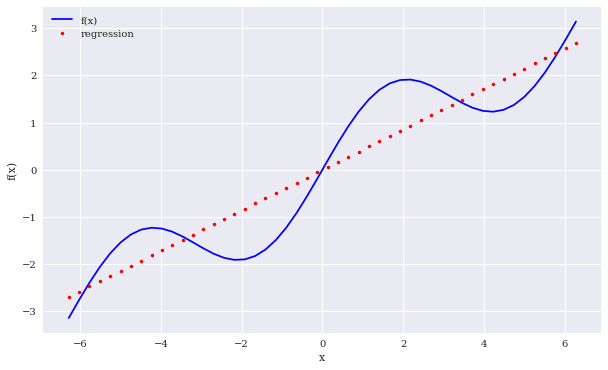

In [12]:
create_plot([x, x], [f(x), ry], ['b', 'r.'],
            ['f(x)', 'regression'], ['x', 'f(x)'])
# plt.savefig('../../images/ch11/math_02.png');

存在同时画出多个图像，只要通过list[]把需要的参数按顺序一一对应0放进去。

In [13]:
reg = np.polyfit(x, f(x), deg=5)
ry = np.polyval(reg, x)

In [14]:
reg

array([ 1.37920761e-03,  8.94178154e-19, -6.82525072e-02,  1.24251146e-17,
        1.11425209e+00, -4.48416218e-17])

#### 默认的是full = False，只会输出各个degree上的参数。从最高的degree到最低的(0),从5次项上的参数到0次项(截距)上的参数。4次项8.94178154e-19,2次项1.24251146e-17和0次项-4.48416218e-17上面的参数非常接近于0，所以函数更加接近于奇函数(-19就是0.1的19次方)。

In [15]:
np.mean((f(x) - ry)**2)

0.053882515523087406

#### 相比直线的一次多项式算出的R2的mean要小的多：0.4206477371868663  > 0.053882515523087406

#### 理论上，提高解释参数的数量（由1次到多次多项式）会带来R2mean的下降，和拟合程度的提高，也可能不变，不变的情况下，新加入的项就失去了作用，没有解释能力，但是新加解释参数会增加电脑的运算量，所以，根据剃刀理论，如無必要，勿增實體，会对函数进行降次/维。

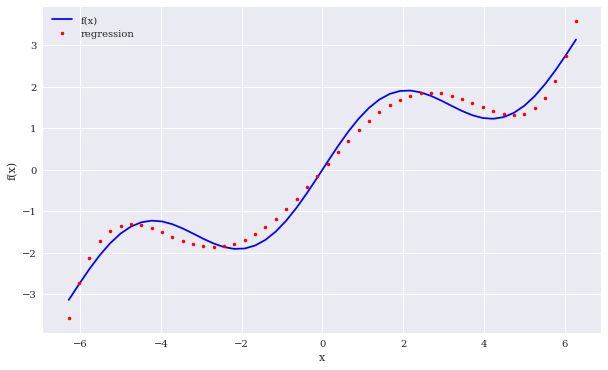

In [16]:
create_plot([x, x], [f(x), ry], ['b', 'r.'],
            ['f(x)', 'regression'], ['x', 'f(x)'])
# plt.savefig('../../images/ch11/math_03.png');

维度增加，可能会使拟合更加贴近原函数，单单1次多项式是直线，在拟合曲线上效果不好。

In [17]:
reg = np.polyfit(x, f(x), 7)
ry = np.polyval(reg, x)

In [18]:
reg

array([-5.47508597e-05,  6.29207435e-19,  4.99394999e-03, -3.27841038e-17,
       -1.35368487e-01,  3.68516585e-16,  1.41870278e+00, -6.07977093e-16])

#### 7次多项式拟合后6，4，2，0次项的参数也接近于0，说明拟合后的函数还是接近于奇函数。

In [19]:
np.allclose(f(x), ry)  

False

In [20]:
np.mean((f(x) - ry) ** 2)  

0.0017769134759517463

#### np.allclose是验证两组数是不是一致，返回为False，尽管R2mean已经很接近于0了，但是还是存在residual残差。

#### 尽管函数已经很逼近，但是受限于函数本身的结构必须是多项式的形式(x的整数次方)，可能不一定适用于所有数据的拟合。(不具有普适性)

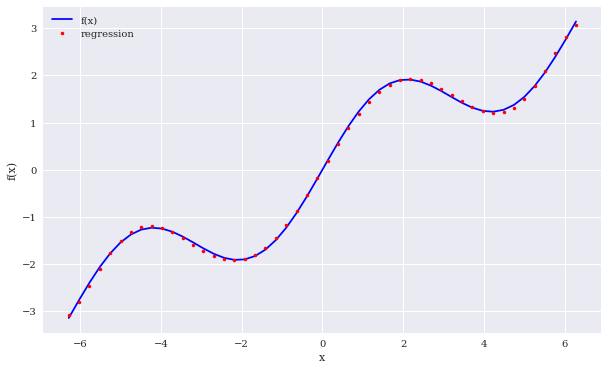

In [21]:
create_plot([x, x], [f(x), ry], ['b', 'r.'],
            ['f(x)', 'regression'], ['x', 'f(x)'])
# plt.savefig('../../images/ch11/math_04.png');

#### Individual Basis Functions(更加通用的方法)

### 相当于是形成一个50 * 4的矩阵，50是有50个数，而4是设定好有4个解释参数，多项式的拟合中，每一列解释参数乘以的是固定的从最高次项式到0次项(截距)：X^n + x^(n - 1)...,实际上电脑远算上是先开出这个矩阵的转置矩阵：4 * 50(就是把矩阵横着写，再把它转置出来。矩阵的列上的数字就是dataX经过不同的预设操作后的结果，拟合所要求的就是给这个4 * 50 上面的4行数赋予的参数。使纵向上看，各项x的式子在加总后的结果趋向于y值。

In [22]:
matrix = np.zeros((3 + 1, len(x)))  
matrix[3, :] = x ** 3  
matrix[2, :] = x ** 2  
matrix[1, :] = x  
matrix[0, :] = 1  

In [23]:
matrix.T.round(2)[:5]

array([[   1.  ,   -6.28,   39.48, -248.05],
       [   1.  ,   -6.03,   36.32, -218.9 ],
       [   1.  ,   -5.77,   33.3 , -192.13],
       [   1.  ,   -5.51,   30.4 , -167.63],
       [   1.  ,   -5.26,   27.64, -145.31]])

In [24]:
reg = np.linalg.lstsq(matrix.T, f(x), rcond=None)[0]  

In [25]:
reg.round(4)  

array([ 0.    ,  0.5628, -0.    , -0.0054])

#### 矩阵转置：matrix.T，np.linalg.lstsq(matrix.T, f(x))拟合的函数：(需要给出参数的基于dataX操作后的矩阵，实际的dataY值:拟合所希望达成的最佳结果)，[0]代表只取第一行(各个项的参数)

#### 因为matrix[0, :] = 1 ，所以[ 0.    ,  0.5628, -0.    , -0.0054]这个元素为4的array里面的第一个参数是赋予0次项(截距的)，同时matrix[3, :] = x ** 3，所以array里面的第4个参数 -0.0054是赋予3次项。这个拟合出来的参数没有固定的排列，完全是与前面设定的操作后的矩阵相关。从参数上也可以看出函数是奇函数：偶数次项上为0，而奇数次项上往往有比较明显的参数。

看结果，两种拟合方式的结果基本上是相同的，用np.linalg.lstsq和polyfit的方式。

In [26]:
ry = np.dot(reg, matrix)  

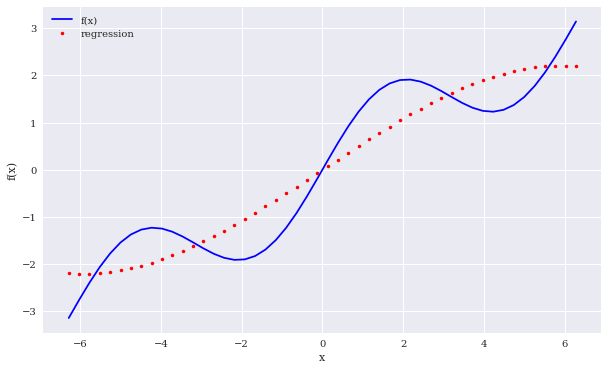

In [27]:
create_plot([x, x], [f(x), ry], ['b', 'r.'],
            ['f(x)', 'regression'], ['x', 'f(x)'])
# plt.savefig('../../images/ch11/math_05.png');

In [28]:
reg.shape

(4,)

In [29]:
matrix.shape

(4, 50)

In [30]:
ry.shape

(50,)

#### np.dot有多种功能，针对矩阵乘以向量的情况，需要(reg向量/array, matrix矩阵)的形式。而对于特定为多项式设计的polyfit和polyval，前面的是拟合，而后面是依据拟合出来的参数对x值进行计算得出拟合后的y值。

#### dot的写法是依据向量的行数是1，而matrix可以拆解出50个4 * 1 的情况，等于说前面的array需要与50个4 * 1的向量相乘，结果是50 * 1的矩阵，实际上就是50个拟合出来的y值。

In [31]:
matrix[3, :] = np.sin(x)  

由于numpy的向量化运算，所以可以用matrix[3, :] = np.sin(x)来替换出第4行不同的一个数组。

In [32]:
reg = np.linalg.lstsq(matrix.T, f(x), rcond=None)[0]

In [33]:
reg.round(4)  

array([0. , 0.5, 0. , 1. ])

In [34]:
ry = np.dot(reg, matrix)

In [35]:
ry

array([-3.14159265, -2.7597098 , -2.39441856, -2.06122529, -1.7735368 ,
       -1.54178344, -1.37273681, -1.26906684, -1.22916717, -1.24726021,
       -1.31377504, -1.41597345, -1.53878317, -1.66578375, -1.78028059,
       -1.86639698, -1.91011256, -1.90018046, -1.82886288, -1.69243728,
       -1.49143985, -1.23063043, -0.91868121, -0.56760941, -0.1919913 ,
        0.1919913 ,  0.56760941,  0.91868121,  1.23063043,  1.49143985,
        1.69243728,  1.82886288,  1.90018046,  1.91011256,  1.86639698,
        1.78028059,  1.66578375,  1.53878317,  1.41597345,  1.31377504,
        1.24726021,  1.22916717,  1.26906684,  1.37273681,  1.54178344,
        1.7735368 ,  2.06122529,  2.39441856,  2.7597098 ,  3.14159265])

### 原函数的表达是sinx + 0.5 * x，而拟合出来的函数式也是这个，最后带入拟合式计算出来的y也与原本的x对应的y完全一致。

In [36]:
np.allclose(f(x), ry)  

True

In [37]:
np.mean((f(x) - ry) ** 2)  

2.425901357950162e-31

R2mean极小，图形上看完全一致。

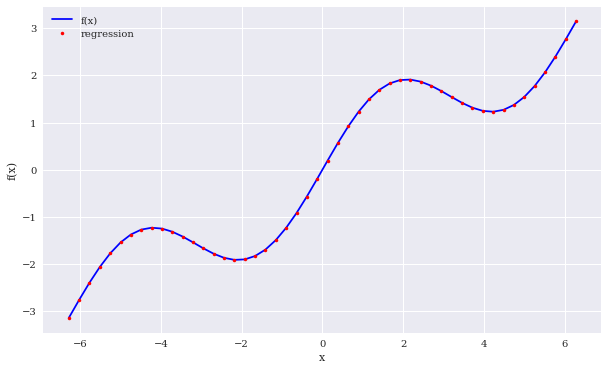

In [38]:
create_plot([x, x], [f(x), ry], ['b', 'r.'],
            ['f(x)', 'regression'], ['x', 'f(x)'])
# plt.savefig('../../images/ch11/math_06.png');

#### Noisy Data

In [42]:
xn = np.linspace(-2 * np.pi, 2 * np.pi, 50)  
xn = xn + 0.15 * np.random.standard_normal(len(xn))  
yn = f(xn) + 0.25 * np.random.standard_normal(len(xn))  

#### 对x进行一些操作，使得xn和x存在一定的误差，yn和y也存在一定的误差。因为在收集data的过程中会存在和实际上的x和y不同的情况，这个误差会导致最后拟合出来的残差可能比真实数据拟合出来结果的误差更大。

In [43]:
reg = np.polyfit(xn, yn, 7)
ry = np.polyval(reg, xn)

In [45]:
np.mean((f(xn) - ry) ** 2)

0.015270777076706403

In [46]:
np.mean((f(x) - ry) ** 2)

0.027198336630140898

In [49]:
reg_1 = np.polyfit(x, f(x), 7)
ry_1 = np.polyval(reg, x)

In [50]:
np.mean((f(x) - ry_1) ** 2)

0.012688956551257022

#### 0.015270777076706403, 0.027198336630140898和0.012688956551257022三个结果完全不同，第一个是有误差的拟合结果和有误差的y之间的R2mean，第二个是第一个是有误差的拟合结果和无误差的y之间的，最后一个是无误差的的拟合结果和无误差的y直接的。现实实践中是无法看到无误差的x和f(x)的，所以最好的情况就是第一种，用有误差的x和y拟合(一一对应)，同时缩小误差，使其更加贴近真实的x和y值。

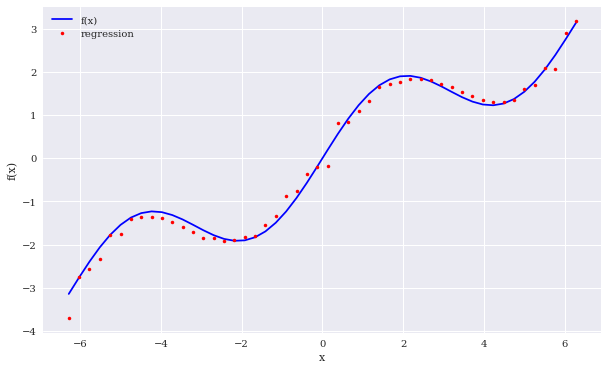

In [44]:
create_plot([x, x], [f(x), ry], ['b', 'r.'],
            ['f(x)', 'regression'], ['x', 'f(x)'])
# plt.savefig('../../images/ch11/math_07.png');

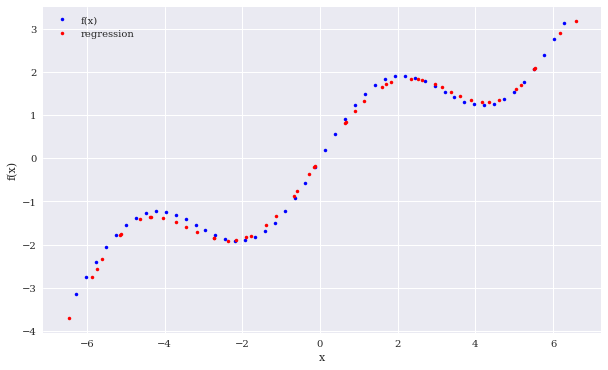

In [52]:
create_plot([x, xn], [f(x), ry], ['b.', 'r.'],
            ['f(x)', 'regression'], ['x', 'f(x)'])

#### 真实的情况和用有误差的xn和yn拟合出来的曲线可能差距也不大，这是实际中最常见的情况，所以可以近似的认为这个函数的拟合也是成功的。

#### Unsorted Data

#### data的顺序是完全不会对最后拟合的结果产生影响，因为按照原理最后是算每一行的sum从而得出每一行对应的参数，所以哪一个值先丢进来对结果无影响。

In [55]:
xu = np.random.rand(50) * 4 * np.pi - 2 * np.pi  
yu = f(xu)

#### 随机从-2π到2π之间取数：np.random.rand(50) * 4 * np.pi代表前面的数是0到4π之间的数，再 - 2 * np.pi得出的数是-2π到2π，而linespace的结果是按顺序从-2π到2π之间均匀的取出50个之间距离相等的数。这一步就是对比无顺序和有顺序的取数对拟合的影响。

In [56]:
print(xu[:10].round(2))  
print(yu[:10].round(2))  

[-0.58  1.95 -5.29  1.86  4.13  0.5   4.42 -4.75  6.11 -5.74]
[-0.84  1.9  -1.81  1.89  1.23  0.73  1.25 -1.37  2.88 -2.36]


In [57]:
reg = np.polyfit(xu, yu, 5)
ry = np.polyval(reg, xu)

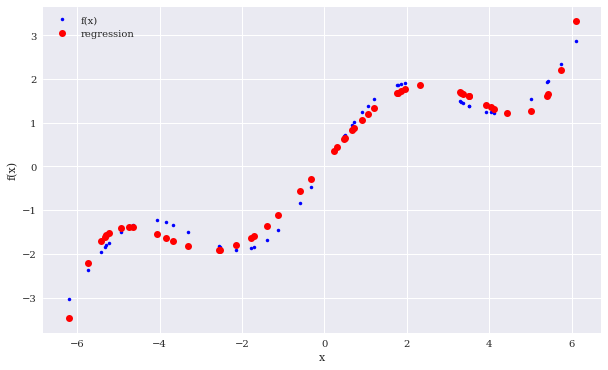

In [58]:
create_plot([xu, xu], [yu, ry], ['b.', 'ro'],
            ['f(x)', 'regression'], ['x', 'f(x)'])
# plt.savefig('../../images/ch11/math_08.png');

结果上看是完全没有影响。

#### Multiple Dimensions多维

In [65]:
def fm(p):
    x, y = p
    return np.sin(x) + 0.25 * x + np.sqrt(y) + 0.05 * y ** 2

sinx + 0.25 * x + y ^ 0.5 + 0.05 * y ^ 2

In [66]:
x = np.linspace(0, 10, 20)
y = np.linspace(0, 10, 20)
X, Y = np.meshgrid(x, y)  

In [67]:
X

array([[ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
         2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
         5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
         7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ],
       [ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
         2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
         5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
         7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ],
       [ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
         2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
         5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
         7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ],
       [ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
         2.63157895,  3.15789474,  3.68421053,  

In [68]:
Z = fm((X, Y))
x = X.flatten()  
y = Y.flatten()  

#### 将组合成对应关系的点矩阵X, Y带入fm((X, Y))函数，然后用.flatten()将X, Y摊平成array，做函数的情况下这两步是通用的，先meshgrid让x值和y值产生对应关系，再用flatten()将array摊开。
#### (因为对应后的形式是array([[ 0.        ,  0.52631579,...]])这种形式，需要把[[拿掉)。

In [69]:
from mpl_toolkits.mplot3d import Axes3D  

画3D图需要引入Axes3D包：from mpl_toolkits.mplot3d import Axes3D  

D:\ProgramData\Anaconda3\envs\t2.3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  


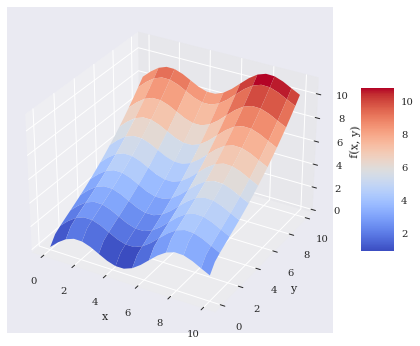

In [70]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2,
                       cmap='coolwarm', linewidth=0.5,
                       antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)
# plt.savefig('../../images/ch11/math_09.png');

In [71]:
matrix = np.zeros((len(x), 6 + 1))
matrix[:, 6] = np.sqrt(y)  
matrix[:, 5] = np.sin(x)  
matrix[:, 4] = y ** 2
matrix[:, 3] = x ** 2
matrix[:, 2] = y
matrix[:, 1] = x
matrix[:, 0] = 1

### 因为这种方法的灵活性，可以设置多个不同的解释变数，然后形成矩阵400 * 7，看拟合后的解释参数，明显影响结果的可以留下，解释参数趋近于0的可以删掉，最终得出函数的拟合式。

In [73]:
reg = np.linalg.lstsq(matrix, fm((x, y)), rcond=None)[0]

In [74]:
RZ = np.dot(matrix, reg).reshape((20, 20))  

dot：矩阵相乘

In [76]:
reg.round(4)

array([-0.  ,  0.25,  0.  , -0.  ,  0.05,  1.  ,  1.  ])

从矩阵的第0行对应的解释参数到第7行的解释参数

D:\ProgramData\Anaconda3\envs\t2.3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  
D:\ProgramData\Anaconda3\envs\t2.3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  if sys.path[0] == '':


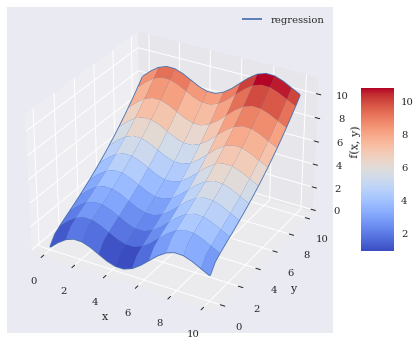

In [77]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
surf1 = ax.plot_surface(X, Y, Z, rstride=2, cstride=2,
            cmap=mpl.cm.coolwarm, linewidth=0.5,
            antialiased=True)  
surf2 = ax.plot_wireframe(X, Y, RZ, rstride=2, cstride=2,
                          label='regression')  
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.legend()
fig.colorbar(surf, shrink=0.5, aspect=5)
# plt.savefig('../../images/ch11/math_10.png');

和结果完美契合，两个平面完全重合。

### Interpolation内插：前提：将数据从小排到大

### 和regression不同，Interpolation是要确保每一个点都要在拟合出来的函数曲线上，方法通常是采用cubic spline三次样条插值，方法就是把两个点之间的一段看作一个需要拟合的曲线。

### 后面的函数是对于前面函数累加再加上一个3次多项式函数，使函数图像调整，满足对新的点形成一段曲线的要求，第一个点到第二个点的多项式表达式是f(x), 到了第3个点，多项式就变成f(x) + g(x),到第4个点就是f(x) + g(x) + z(x),一直加下去。y样式上有点像将一个个多项式串起来，所以是spline样条/链条

### 为了能够平滑的将两点相连，需要保证点两边的函数从两边逼近点。所以前面一个点和后面一个点到中间这个点会有两个不同的3次函数式，而这两个函数式取无限趋向于中间这一点的x值时(极限，微积分)，两函数的y值相等且等于中间的那个点的y值，并且两个函数的1阶和2阶导函数值相等。

### 例：要求从第1个点到第3个点的多项式: 满足条件1，f(x)的一阶和二阶导函数与f(x) + g(x)的一阶和二阶导函数在第2点的值是相等的:平滑 - > 这个点是二阶可导(两个二阶导函数的值相同)，非极值(图像上看不是尖角) - > 这个点是一阶可导（两个一阶导函数的值相同）; 同时点连续，没有出现断层:两个函数在逼近中间的第2点的y值是一致的 -> 左边的积分值等于右边。

### 之后将每一段的3次函数式加起来，形成类似于泰勒展开的表达式，计算量大，每一段都是一次拟合，对于每一段函数都需要拟合出4个解释参数。

### 为什么使用cubic spline的方法，用3次函数来拟合是因为要想拟合出的曲线是平滑的需要对每一点对应的前后两个函数做微分，一阶导函数看升降，二阶导函数看升降的快慢，要平滑连接需要保证在逼近这一点时，两个函数的一阶和二阶导函数值相等。由于参数多，计算量大，所以遍历所有二次导函数不为常数的函数式，最简洁的结构就是3次函数。

In [81]:
import scipy.interpolate as spi  

In [82]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 25)

In [83]:
def f(x):
    return np.sin(x) + 0.5 * x

In [84]:
ipo = spi.splrep(x, f(x), k=1)  

In [85]:
iy = spi.splev(x, ipo)  

In [88]:
x

array([-6.28318531, -5.75958653, -5.23598776, -4.71238898, -4.1887902 ,
       -3.66519143, -3.14159265, -2.61799388, -2.0943951 , -1.57079633,
       -1.04719755, -0.52359878,  0.        ,  0.52359878,  1.04719755,
        1.57079633,  2.0943951 ,  2.61799388,  3.14159265,  3.66519143,
        4.1887902 ,  4.71238898,  5.23598776,  5.75958653,  6.28318531])

In [87]:
ipo

(array([-6.28318531, -6.28318531, -5.75958653, -5.23598776, -4.71238898,
        -4.1887902 , -3.66519143, -3.14159265, -2.61799388, -2.0943951 ,
        -1.57079633, -1.04719755, -0.52359878,  0.        ,  0.52359878,
         1.04719755,  1.57079633,  2.0943951 ,  2.61799388,  3.14159265,
         3.66519143,  4.1887902 ,  4.71238898,  5.23598776,  5.75958653,
         6.28318531,  6.28318531]),
 array([-3.14159265, -2.37979327, -1.75196847, -1.35619449, -1.2283697 ,
        -1.33259571, -1.57079633, -1.80899694, -1.91322295, -1.78539816,
        -1.38962418, -0.76179939,  0.        ,  0.76179939,  1.38962418,
         1.78539816,  1.91322295,  1.80899694,  1.57079633,  1.33259571,
         1.2283697 ,  1.35619449,  1.75196847,  2.37979327,  3.14159265,
         0.        ,  0.        ]),
 1)

### spi.splrep(x, f(x),k = 1一次方程:预设degree为3，k的值从1到5)，这个函数的作用就是拟合出每一段函数用的参数

### IPO是两个array和一个数：代表degree的个数，第一个array里面是27个x值，第一个和最后一个重复了一次，第二个array里面是按照一维的形式估计出来的两个点之间的参数:y = kx里面的k，如果两个数的大小完全一致，增加的kx里面的k就会取0。

### k=1代表degree为1，是用一次线性的方式估计函数的。

spi.splev(x, ipo) 将x和参数式放入,输出y值的结果

In [94]:
iy

array([-3.14159265, -2.37979327, -1.75196847, -1.35619449, -1.2283697 ,
       -1.33259571, -1.57079633, -1.80899694, -1.91322295, -1.78539816,
       -1.38962418, -0.76179939,  0.        ,  0.76179939,  1.38962418,
        1.78539816,  1.91322295,  1.80899694,  1.57079633,  1.33259571,
        1.2283697 ,  1.35619449,  1.75196847,  2.37979327,  3.14159265])

In [95]:
np.allclose(f(x), iy)  

True

完全一致，因为interplotion拟合的基础就是点在线上，两点之间尽量平滑过度。

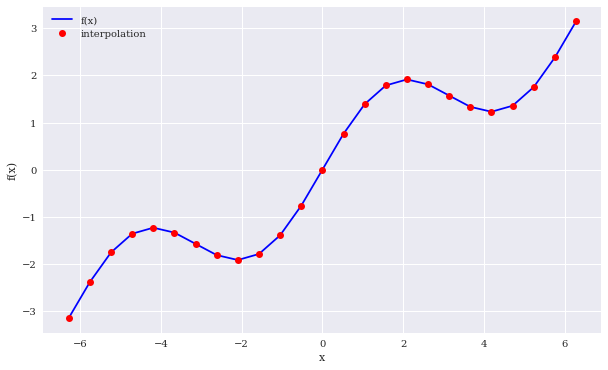

In [96]:
create_plot([x, x], [f(x), iy], ['b', 'ro'],
            ['f(x)', 'interpolation'], ['x', 'f(x)'])
# plt.savefig('../../images/ch11/math_11.png');

红色点在蓝色线上，确实做到了interplotion的作用，但是是整体的图，无法看清具体每一段(两点之间)的拟合情况

In [92]:
xd = np.linspace(1.0, 3.0, 50)  
iyd = spi.splev(xd, ipo)

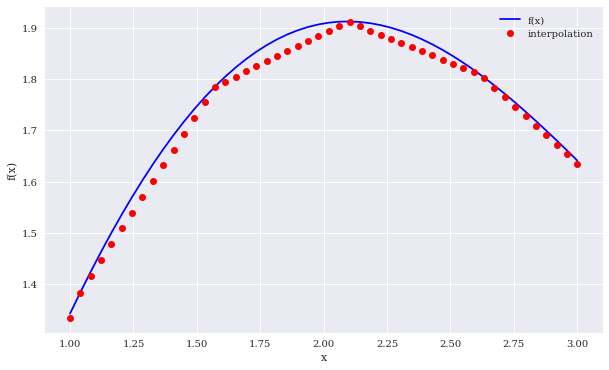

In [93]:
create_plot([xd, xd], [f(xd), iyd], ['b', 'ro'],
            ['f(x)', 'interpolation'], ['x', 'f(x)'])
# plt.savefig('../../images/ch11/math_12.png');

 更小的视角下能够看到实际上拟合线是分段的，每一段转折点都是原来的25个点，linspace(1.0, 3.0, 50)在1到3中间取50个点，带入函数。微积分的思想，对于任何的函数曲线，只要不断细分每个段的大小，在极小的区间里面，两个点之间的连线就会无限趋近于斜线。

In [99]:
ipo = spi.splrep(x, f(x), k=3)  
iyd = spi.splev(xd, ipo)  

In [100]:
np.allclose(f(xd), iyd)  

False

用xd来拟合原来的函数就无法做到完全重叠，因为从上图可以看出在1到3这个区间里面，作为确定函数的原来25个点中有大概5个点，构成了4段斜线，但用xd拟合出来的有50个节点，更加切合原函数，但是与之前拟合的函数存在，也不可能是原来的25个点。从np.mean((f(xd) - iyd) ** 2) 看出，与之前拟合的函数的差异还是不大的

In [56]:
np.mean((f(xd) - iyd) ** 2)  

1.1349319851436892e-08

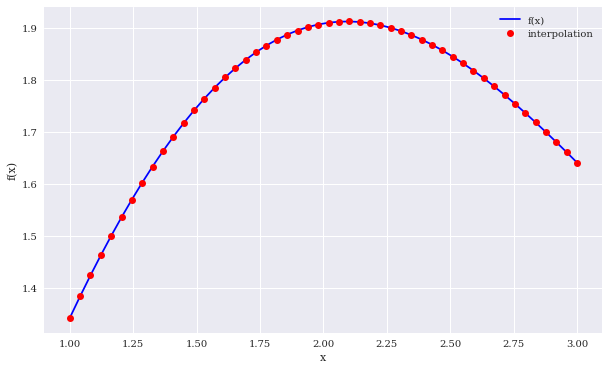

In [57]:
create_plot([xd, xd], [f(xd), iyd], ['b', 'ro'],
            ['f(x)', 'interpolation'], ['x', 'f(x)'])
# plt.savefig('../../images/ch11/math_13.png');

### 应用，金融中很多假设会设定在极小的区间里面两个因素的变化是线性的，比如：在极小区间内利率和现值呈线性变化

## Convex Optimization凸优化:找到凸函数的极大值或者极小值:最优解 .

## 存在极值点的曲线函数，比如说x^2就是一个凸函数，一阶导函数在极值点处为0，同时极值点两边一阶导函数的值异号：一正一负(一边是增函数，一边是减函数)；x。两变量的情况是f(x, y) = x^2 + y^2, 就是在x,y,z空间里面，固定任意一轴，剩下的两轴组成的平面就是一个凸函数曲线，存在极大值。确定二元凸函数需要对函数做一阶和二阶偏导数，需要验证存在两个偏导数都为0的点存在。因为是偏导数所以对x和y都有不同的微分值，从而可以构成一个矩阵。

### [fxx, fxy]:fxx先对x做偏导数(y就被当做常数)，然后再对x做偏导(前面偏导后);fyx
### [fyx, fyy]

### 凸优化的作用是，对于衍生品定价模型来说，可以通过市场上的价格数据来拟合出模型(市场上的价格往往是流动性大的金融衍生品)，或者是优化已经存在的模型，核心就是做到使模型能够更加贴合市场，反应市场上的价格变动。在模型建立之后，在投入实际使用之前，必须通凸优化来校准一下。因为大多数都是理论的结果，和实际相比有较大的差距，而通过凸优化，模型能够部分反映市场的变动，使模型具有一定的实用价值。

### 除此之外，凸优化还在优化效用函数上有应用，因为边际递减的效应，所以单位因素的影响就是一个从低到高再从高到低的过程，符合凸函数的定义。

In [103]:
def fm(p):
    x, y = p
    return (np.sin(x) + 0.05 * x ** 2
          + np.sin(y) + 0.05 * y ** 2)

### sinx +0.05 * x ^2 + siny + 0.05 * y^2

In [104]:
x = np.linspace(-10, 10, 50)
y = np.linspace(-10, 10, 50)
X, Y = np.meshgrid(x, y)
Z = fm((X, Y))

meshgrid将x和y编织起来，然后放入之前定义好的fm(p)去算z值。

D:\ProgramData\Anaconda3\envs\t2.3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  


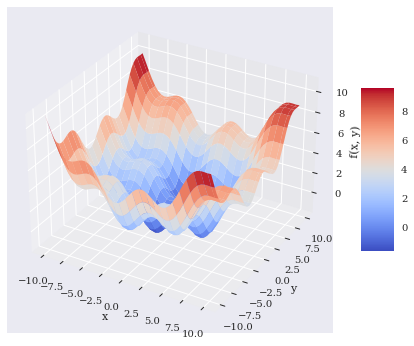

In [105]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2, cmap='coolwarm', linewidth=0.5, antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)
# plt.savefig('../../images/ch11/math_14.png');

### 从图里面可以看到函数确实是凸函数，同时也存在极小值，但是明确的知道局部极小值(local minimum)，但是不能清楚的知道全局的最小值。

### Global Optimization全局优化

In [108]:
import scipy.optimize as sco  

In [109]:
def fo(p):
    x, y = p
    z = np.sin(x) + 0.05 * x ** 2 + np.sin(y) + 0.05 * y ** 2
    if output == True:
        print('%8.4f | %8.4f | %8.4f' % (x, y, z))  
    return z

In [110]:
output = True
sco.brute(fo, ((-10, 10.1, 5), (-10, 10.1, 5)), finish=None)  

-10.0000 | -10.0000 |  11.0880
-10.0000 |  -5.0000 |   7.7529
-10.0000 |   0.0000 |   5.5440
-10.0000 |   5.0000 |   5.8351
-10.0000 |  10.0000 |  10.0000
 -5.0000 | -10.0000 |   7.7529
 -5.0000 |  -5.0000 |   4.4178
 -5.0000 |   0.0000 |   2.2089
 -5.0000 |   5.0000 |   2.5000
 -5.0000 |  10.0000 |   6.6649
  0.0000 | -10.0000 |   5.5440
  0.0000 |  -5.0000 |   2.2089
  0.0000 |   0.0000 |   0.0000
  0.0000 |   5.0000 |   0.2911
  0.0000 |  10.0000 |   4.4560
  5.0000 | -10.0000 |   5.8351
  5.0000 |  -5.0000 |   2.5000
  5.0000 |   0.0000 |   0.2911
  5.0000 |   5.0000 |   0.5822
  5.0000 |  10.0000 |   4.7471
 10.0000 | -10.0000 |  10.0000
 10.0000 |  -5.0000 |   6.6649
 10.0000 |   0.0000 |   4.4560
 10.0000 |   5.0000 |   4.7471
 10.0000 |  10.0000 |   8.9120


array([0., 0.])

### sco.brute返回的结果是array([0., 0.])，就是两个自变量在极值处取的值。output = True，所以print出所有的函数在找极值点的过程中计算过的x,y,z。

### 定义一个函数，然后包括计算z值的公式，还有一个if判定语句，将函数放入brute中，暴力检索出在区域上极值点的具体x和y，带入公式计算出z值，如果在运行函数前给output赋予的值为True，就打印出计算过的所有x,y,z以(x|y|z)的形式。如果为false就仅仅计算brute函数，所以如果不想了解运算过程可以赋值false。
### ((-10, 10.1, 5), (-10, 10.1, 5))前面是x值，后面是y值，括起来满足fo(p)的表达形式，x和y都是-10到10的五个数，10.1是说将10包括在内。
### finish是在计算多个data的极小值时，可以选择将上一个data的极小值作为下一个data暴力检索的初始值，免去手动初始化的麻烦。默认为None。
### brute是一种暴力检索的方式，撒出去无数点，然后去找当中的全域的极小值。

In [128]:
output = False
opt1 = sco.brute(fo, ((-10, 10.1, 0.1), (-10, 10.1, 0.1)), finish=None)

In [129]:
opt1

array([-1.4, -1.4])

#### 用来暴力检索的数字更加稠密了，从5个点到200多个点，更加精确了，输出的值也符合前面5个点求出的结果，确实是距离(0,0)点最近，靠近z轴。

In [115]:
fm(opt1)

-1.7748994599769203

#### 带入函数算出z值

### Local Optimization局部优化

## 前面全局优化的方法比较暴力，同时也比较浪费时间(电脑运算)，尤其是在放入的点比较多和密集的情况下。所以全局优化一般只会出一个大致的位置，具体结果的比较和筛选，需要进行局部优化。

In [116]:
output = True
opt2 = sco.fmin(fo, opt1, xtol=0.001, ftol=0.001,
                maxiter=15, maxfun=20)  

 -1.4000 |  -1.4000 |  -1.7749
 -1.4700 |  -1.4000 |  -1.7743
 -1.4000 |  -1.4700 |  -1.7743
 -1.3300 |  -1.4700 |  -1.7696
 -1.4350 |  -1.4175 |  -1.7756
 -1.4350 |  -1.3475 |  -1.7722
 -1.4088 |  -1.4394 |  -1.7755
 -1.4438 |  -1.4569 |  -1.7751
 -1.4328 |  -1.4427 |  -1.7756
 -1.4591 |  -1.4208 |  -1.7752
 -1.4213 |  -1.4347 |  -1.7757
 -1.4235 |  -1.4096 |  -1.7755
 -1.4305 |  -1.4344 |  -1.7757
 -1.4168 |  -1.4516 |  -1.7753
 -1.4305 |  -1.4260 |  -1.7757
 -1.4396 |  -1.4257 |  -1.7756
 -1.4259 |  -1.4325 |  -1.7757
 -1.4259 |  -1.4241 |  -1.7757
 -1.4304 |  -1.4177 |  -1.7757
 -1.4270 |  -1.4288 |  -1.7757


In [120]:
sco.fmin?

### sco.fmin需要全局优化的结果opt1，xtol=0.001和ftol=0.001是容忍值，前者对x和y进行规定，相当于是x和y取值的变化最少也要是0.001(并不是取值一定要是小数点后3位，变化也可以是0.0015)；后者是递归里面如果下一个算出的z值和当前的z值差距小于0.0001就停止继续检索。maxiter=15指函数最多迭代15次，maxfun=20计算最多20个值就停下。通常一次迭代是检验出两个数，所以看参数，局部搜索应该会在20个数的地方停止。
### 看数值是从x,y均为-1.4开始往下(小)计算，一直到第20个数停止计算，目前看出现了几个局部极值-1.7757

In [122]:
output = True
opt3 = sco.fmin(fo, opt1, xtol=0.001)

 -1.4000 |  -1.4000 |  -1.7749
 -1.4700 |  -1.4000 |  -1.7743
 -1.4000 |  -1.4700 |  -1.7743
 -1.3300 |  -1.4700 |  -1.7696
 -1.4350 |  -1.4175 |  -1.7756
 -1.4350 |  -1.3475 |  -1.7722
 -1.4088 |  -1.4394 |  -1.7755
 -1.4438 |  -1.4569 |  -1.7751
 -1.4328 |  -1.4427 |  -1.7756
 -1.4591 |  -1.4208 |  -1.7752
 -1.4213 |  -1.4347 |  -1.7757
 -1.4235 |  -1.4096 |  -1.7755
 -1.4305 |  -1.4344 |  -1.7757
 -1.4168 |  -1.4516 |  -1.7753
 -1.4305 |  -1.4260 |  -1.7757
 -1.4396 |  -1.4257 |  -1.7756
 -1.4259 |  -1.4325 |  -1.7757
 -1.4259 |  -1.4241 |  -1.7757
 -1.4304 |  -1.4177 |  -1.7757
 -1.4270 |  -1.4288 |  -1.7757
 -1.4316 |  -1.4307 |  -1.7757
 -1.4273 |  -1.4258 |  -1.7757
 -1.4239 |  -1.4285 |  -1.7757
 -1.4288 |  -1.4266 |  -1.7757
 -1.4285 |  -1.4297 |  -1.7757
 -1.4276 |  -1.4267 |  -1.7757
 -1.4258 |  -1.4289 |  -1.7757
 -1.4281 |  -1.4272 |  -1.7757
 -1.4286 |  -1.4252 |  -1.7757
 -1.4274 |  -1.4279 |  -1.7757
 -1.4279 |  -1.4283 |  -1.7757
 -1.4277 |  -1.4271 |  -1.7757
Optimiza

### 去掉对具体次数的限制，在仅仅规定容忍度为0.001的前提下，得出的最好结果是-1.775726，经过16次迭代，找出来32个数。

In [123]:
opt2

array([-1.42743423, -1.42786531])

In [125]:
opt3

array([-1.42743423, -1.42786531])

In [126]:
fm(opt2)

-1.7757255920546628

In [130]:
output = False
opt4 = sco.fmin(fo, (2.0, 2.0), maxiter=250)

Optimization terminated successfully.
         Current function value: 0.015826
         Iterations: 46
         Function evaluations: 86


In [131]:
print(fm((2.0, 2.0)),fm(opt4))

2.2185948536513633 0.0158257532746805


#### 还是有在取极值，只不过取到的位置是一个相对的局部极小值。

### 如果没有全域极值作为基础，随意取一个较大的区间做local optimization，就很容易掉到区域极值点，得到的不是我们期望的在全域层面看的全局极值点的精确位置。

### Constrained Optimization

### 受限制的优化，很常见，因为金融问题的本质就是资源的有限性，所以需要求出在一定限制条件下的相对最优:极值。

In [132]:
import math

def Eu(p):  
    s, b = p
    return -(0.5 * math.sqrt(s * 15 + b * 5) +
             0.5 * math.sqrt(s * 5 + b * 12))

### 研究的是两期的价值模型，加上-，变成研究极小值。市场上有两个出项(两种可能性)，设定两种可能性是一致的，所以设置为0.5。math.sqrt(s * 15 + b * 5)和math.sqrt(s * 5 + b * 12)代表两个带根号的效用函数，s和b是两种衍生品的数量，而15，5代表s的价值可能会是15或者是5，同时b的价值可能会是5或者12，两种可能出现的机率是一致的0.5，第一种可能的效用是(s * 15 + b * 5)^0.5就是根号下当前价值下的所有价值，第二种可能的效用是(s * 5 + b * 12)^0.5。

In [134]:
cons = ({'type': 'ineq',
         'fun': lambda p: 100 - p[0] * 10 - p[1] * 10})  

### 限制函数是当前价值下的s和b加总价值不超过100，s和b的当前价值都是10.从图形上看有点像有一条限制函数线在线之下的阴影区域里面找价值模型函数的最优解。'type': 'ineq'需要写出来是不等式

In [137]:
bnds = ((0, 1000), (0, 1000))  

### x和y的定义域

In [136]:
result = sco.minimize(Eu, [5, 5], method='SLSQP',
                       bounds=bnds, constraints=cons)  

In [76]:
result

     fun: -9.700883611487832
     jac: array([-0.48508096, -0.48489535])
 message: 'Optimization terminated successfully.'
    nfev: 21
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([8.02547122, 1.97452878])

###  x: array([8.02547122, 1.97452878])极值点的坐标(x,y);--fun: -9.700883611487832就是z值:极小值，因为取了负号，所以实际上最大的效用值，最优点的值为9.700883611487832;--jac: array([-0.48508096, -0.48489535])梯度：一阶偏导函数值：都还没有到0，说明实际上还是没有到不受限下的极值点，但是收到限制，只能取到相对的最大值。nfev: 21目标函数计算的次数，nit: 5迭代的次数，njev: 5梯度(一阶导函数)计算了几次。status: 0和message: 'Optimization terminated successfully.'意思是算完了，找到最优的解。

In [138]:
result['x']  

array([8.02547122, 1.97452878])

#### s和b的最优解值相似是因为s的价值是【15，5】，而b的价值是【5，12】，如果b是【5， 15】得出的两点的个数就会一致，因为两个事件的发生机率是一样的0.5，

In [139]:
-result['fun']  

9.700883611487832

In [79]:
np.dot(result['x'], [10, 10])  

99.99999999999999

### 99.99999999999999是当前价值乘以配比的s和b的数量得出的结果，可以看出还是在100范围内，几乎是完全利用了100元的预算，无限接近于100.

## Integration积分

### 现金流量折现，需要算在一定期间的现金流量，现金流量的计算涉及到出现不同回报的概率，基本上是价值乘上权重累加获得的期望值就是这一时期的现金流量，期望值需要通过积分的方式来算出来。

In [140]:
import scipy.integrate as sci

In [141]:
def f(x):
    return np.sin(x) + 0.5 * x

In [142]:
x = np.linspace(0, 10)
y = f(x)
a = 0.5  
b = 9.5  
Ix = np.linspace(a, b)  
Iy = f(Ix)  #  <4>

#### 从0.5到9.5的区间，画阴影。

In [147]:
from matplotlib.patches import Polygon

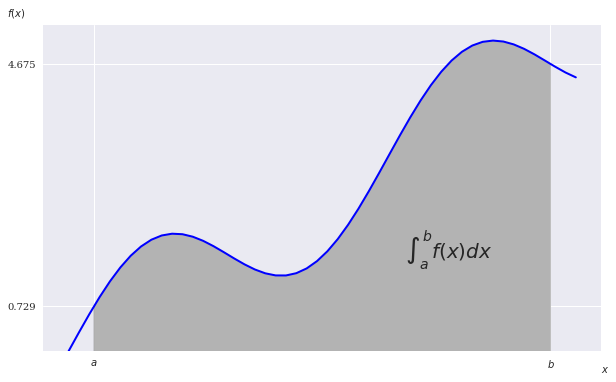

In [148]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(x, y, 'b', linewidth=2)
plt.ylim(bottom=0)
Ix = np.linspace(a, b)
Iy = f(Ix)
verts = [(a, 0)] + list(zip(Ix, Iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='0.7', edgecolor='0.5')
ax.add_patch(poly)
plt.text(0.75 * (a + b), 1.5, r"$\int_a^b f(x)dx$",
         horizontalalignment='center', fontsize=20)
plt.figtext(0.9, 0.075, '$x$')
plt.figtext(0.075, 0.9, '$f(x)$')
ax.set_xticks((a, b))
ax.set_xticklabels(('$a$', '$b$'))
ax.set_yticks([f(a), f(b)]);
# plt.savefig('../../images/ch11/math_15.png');

### Numerical Integration积分的数值

In [150]:
sci.fixed_quad(f, a, b)

(24.366995967084602, None)

### 返回两个值，前面的是定积分的结果，后面的是是否成功

In [151]:
sci.fixed_quad(f, a, b)[0]

24.366995967084602

In [152]:
sci.quad(f, a, b)[0]

24.374754718086752

In [153]:
sci.romberg(f, a, b)

24.374754718086713

### fixed_quad是fixed_guass quadrature固定高斯数值积分，quad是自适应数值积分(adaptive quadrature), romberg是龙贝格数值积分法。里面(f, a, b)：(公式，上限，下限)

In [154]:
xi = np.linspace(0.5, 9.5, 25)

In [89]:
sci.trapz(f(xi), xi)

24.352733271544516

In [90]:
sci.simps(f(xi), xi)

24.37496418455075

### trapz是高中学的梯形法，将函数阴影面积(求积分)无限细分，获得的一个类似于梯形的长条，将细分出的长条面积相加就是积分值；trapz需要自己划分出bar的区间：(0.5, 9.5, 25)0.5到9.5中取24份，还需要f(xi)将划分出来的xi带入函数获得yi的数组。simps辛普森法，类似于trapz，需要(f(xi)和xi，结果相比trapz更加精确，但是不适合崎岖的曲线(波动大的)。

### Integration by Simulation用模拟的方式获得定积分

### 思路就是通过暴力撒点的方式，拟合曲线，然后算出曲线在a和b之间的平均高度，然后用平均高度乘以ab之间的距离---- --> |b - a|, 相当于是裁切法，将边界为曲面的类梯形图像裁剪成矩形，再用矩形面积公式(长乘宽)算出裁切后的阴影部分面积，就是定积分的值。

In [157]:
for i in range(1, 20):
    np.random.seed(1000)
    x = np.random.random(i * 1000) * (b - a) + a  
    print(np.mean(f(x)) * (b - a))

24.096579664652538
24.231563927727315
24.44534490838323
24.413148024538735
24.447205826075255
24.36506017333693
24.483970196412503
24.466385176264833
24.478584900134578
24.447757407062348
24.44161203430743
24.40660480689896
24.398622404793706
24.409997326989135
24.35610127142854
24.342149341337457
24.341860553827797
24.336194831748426
24.332971257013302


In [156]:
x = np.linspace(a, b, 1000)
print(np.mean(f(x)) * (b - a))

24.374686530971566


### 生成出19组，每一组里面点的个数是i * 10；np.random.random提供0到1中间的随机数，乘上(b - a):上限和下限之间的距离，再加起始点a，确定出a到b之间的i * 10个随机数；np.mean(f(x)) * (b - a)矩形面积公式算出积分值。
### x = np.linspace(a, b, 1000)另外一种取数方法，原理和Integration by Simulation一样，这个抽出来的数是递增的数列。

## Symbolic Computation符号运算

### Basics

In [160]:
import sympy as sy

In [161]:
x = sy.Symbol('x')  
y = sy.Symbol('y')  

In [162]:
type(x)

sympy.core.symbol.Symbol

### sy.Symbol是符号化

In [163]:
sy.sqrt(x)  

sqrt(x)

In [164]:
sqrt(x)

NameError: name 'sqrt' is not defined

#### sy.sqrt可以，直接sqrt会报错。

In [175]:
3 + sy.sqrt(x) - 4 ** 2  

D:\ProgramData\Anaconda3\envs\t2.3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
D:\ProgramData\Anaconda3\envs\t2.3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
D:\ProgramData\Anaconda3\envs\t2.3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
D:\ProgramData\Anaconda3\envs\t2.3\lib\site-packages\IPython\lib\latextools.py:126: Matpl

In [166]:
f = x ** 2 + 3 + 0.5 * x ** 2 + 3 / 2  

In [98]:
sy.simplify(f)  

1.5*x**2 + 4.5

### sy.simplify自动化简，合并同类项，使函数呈现出最简式。

In [169]:
sy.init_printing(pretty_print=False, use_unicode=False, use_latex = True)

### symbol的意义是可以输出数学函数式，并且可以选择输出的书写格式，包括LaTeX-based, Unicode-based和ASCII3种格式，是符合论文里面可以直接引用的格式类型的。pretty_print是ASCII格式，use_unicode是Unicode-based格式，use_latex是LaTeX-based，初始是pretty_print为True，其他两个为None

### latex网页看起来比较好看，Ascii输出比较看看。

In [170]:
print(sy.pretty(f))

     2      
1.5*x  + 4.5


In [177]:
print(sy.latex(f))

1.5 x^{2} + 4.5


In [178]:
print(sy.pretty(sy.sqrt(x) + 0.5))

  ___      
\/ x  + 0.5


In [179]:
print(sy.latex(sy.sqrt(x) + 0.5))

\sqrt{x} + 0.5


In [172]:
%time pi_str = str(sy.N(sy.pi, 400000))  

Wall time: 8.06 s


#### 计算400000位数的圆周率，然后将浮点数转换为str的形式。N(sy.pi, 400000)：N的作用是计算括号里面的数值，括号里面的第二个数是保留的位数。

In [173]:
pi_str[:42]  

'3.1415926535897932384626433832795028841971'

In [174]:
pi_str[-40:]  

'8245672736856312185020980470362464176199'

In [105]:
%time pi_str.find('061072')  

CPU times: user 94 µs, sys: 1e+03 ns, total: 95 µs
Wall time: 97 µs


80847

In [180]:
%time pi_str.find('3.14') 

Wall time: 0 ns


D:\ProgramData\Anaconda3\envs\t2.3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
D:\ProgramData\Anaconda3\envs\t2.3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
D:\ProgramData\Anaconda3\envs\t2.3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
D:\ProgramData\Anaconda3\envs\t2.3\lib\site-packages\IPython\lib\latextools.py:126: Matpl

In [181]:
%time pi_str.find('0914') 

Wall time: 0 ns


#### str.find可以找出str里面的(第一次遇到这个str就输出index)最小index(从0开始算);pi_str[-40:]:str也可以切片。

### Equations 解方程式

In [182]:
sy.solve(x ** 2 - 1)

In [183]:
sy.solve(x ** 2 - 1 - 3)

In [184]:
sy.solve(x ** 3 + 0.5 * x ** 2 - 1)

In [185]:
sy.solve(x ** 2 + y ** 2)

### sy.solve括号里面写要解的方程，电脑自动将输入的方程求等于0的x或者x,y的解；对于一元多次多项式的解可能存在多个解的情况，就会返回一个list[]，里面是所有可能的解。二元方程式，解出来是以x或者y的表达式的形式(因为二元及其以上的方程式需要两个及以上的方程式来算出具体x和y的值
)

### Integration and Differentiation

In [110]:
a, b = sy.symbols('a b')  

In [111]:
I = sy.Integral(sy.sin(x) + 0.5 * x, (x, a, b))  

In [112]:
print(sy.pretty(I))  

  b                    
  /                    
 |                     
 |  (0.5*x + sin(x)) dx
 |                     
/                      
a                      


#### 画出数学式:积分号；sy.Integral是写出一个需要计算但是还没有计算的积分号，包裹住括号里面的函数式。

In [186]:
int_func = sy.integrate(sy.sin(x) + 0.5 * x, x)  

#### sy.integrate(i小写的形式)：是真的要去算出积分，而不像大写的I仅仅是写出积分号。

In [187]:
print(sy.pretty(int_func))  

      2         
0.25*x  - cos(x)


### 算出不定积分的表达式。

In [188]:
Fb = int_func.subs(x, 9.5).evalf()  
Fa = int_func.subs(x, 0.5).evalf()  

### subs是替换将int_func这个函数不定积分的上下限替换成0.5和9.5，因为sy.integrate已经求过了不定积分的函数式，加上.evalf()让函数带入替代的值，开始计算，分别算出下限Fa和上限Fb，相减得定积分值，Fb - Fa  -> 最准确的积分数值。

In [190]:
Fb - Fa  

In [191]:
int_func_limits = sy.integrate(sy.sin(x) + 0.5 * x, (x, a, b))  

In [118]:
print(sy.pretty(int_func_limits))  

        2         2                  
- 0.25*a  + 0.25*b  + cos(a) - cos(b)


### (x, a, b)代表不定积分上下限取的都是x，替换成a, b。输出的是运算的表达式，就是不定积分取b值减去不定积分取a值。

In [192]:
int_func_limits.subs({a : 0.5, b : 9.5}).evalf()  

### 给a，b赋值，然后.evalf()让式子计算出结果。

In [193]:
sy.integrate(sy.sin(x) + 0.5 * x, (x, 0.5, 9.5))  

### 一步到位

### Differentiation微分

### 金融里面，一些因素对最后价格的影响，需要对函数对所研究元素做微分。

In [194]:
int_func.diff()

#### 积分和微分是相对的，一个函数积分后再微分，得到的还是原来的式子。

In [198]:
f = (sy.sin(x) + 0.05 * x ** 2
   + sy.sin(y) + 0.05 * y ** 2)  

In [199]:
del_x = sy.diff(f, x)  
del_x  

In [200]:
del_y = sy.diff(f, y)  
del_y  

#### sy.diff(f, y)前面的是函数式，后面的是对哪一个变量做偏微分。

In [203]:
xo = sy.nsolve(del_x, -1.5)  
xo  

In [204]:
yo = sy.nsolve(del_y, -1.5)  
yo  

### sy.nsolve更加适用于解非线性的方程式。前面是方程式，后面是起始值。

In [205]:
f.subs({x : xo, y : yo}).evalf()  

In [206]:
xo = sy.nsolve(del_x, 1.5)
xo

In [207]:
yo = sy.nsolve(del_y, 1.5)  
yo

In [208]:
f.subs({x : xo, y : yo}).evalf()  

#### {x : xo, y : yo}把解出来的偏微分为0的点的值，subs里面可以使用{}的dict字典的形式来赋值。−1.42755177876459是凸优化里面取出的极值点的位置，还是需要使用全局优化的方法，得到大致的极小值范围，然后设定极小值。如果初始点设定为1.5，就会落入相对极小值1.74632928225285，但绝对不是全局最小:−1.77572565314742 < 2.2742338105564, sy.nsolve对多个不同的起始值可能会求出多个不同的偏导数函数为0的解，每一个都可以使偏导数等于0，都是相对的极值在一定区域内，但是不一定是全局的极值。(尤其在函数波动大的情况下)

# 总结：1， sy在单个数字运算方面比numpy有更多功能，更加针对数学问题，可以算出方程，积分，微分，极值等数学参数，还可以写出数学公式。2，大致分为函数求导，积分，微分等计算问题和求极值等偏应用的问题。

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:training@tpq.io">training@tpq.io</a>